- 어떤 규칙을 하나의 트리(tree) 형태로 표현한 후 이를 바탕으로 분류나 회귀 문제를 해결하는 알고리즘
- 딥러닝 기반을 제외한 전통적인 통계 기반의 머신러닝 모델중 직관적이고 가장 실용성이 높은 모델중 하나
- scikit-learn의 tree 서브모듈에 DecisionTreeClassifier()

# 로지스틱 회귀로 와인 분류하기 - 화이트 와인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv

In [2]:
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
wine.shape

(6497, 4)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [8]:
wine['class'].unique()

array([0., 1.])

In [9]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

In [10]:
wine_input = wine[['alcohol', 'sugar', 'pH']].to_numpy()
wine_target = wine['class'].to_numpy()

In [11]:
wine_input.shape, wine_target.shape

((6497, 3), (6497,))

# 훈련 세트와 테스트 세트로 분리

In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    wine_input, wine_target, test_size = 0.2, random_state = 42)

In [13]:
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

## 피처 스케일링

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 로지스틱 회귀 모델 구축하기

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [19]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [17]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


## 의사결정나무

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


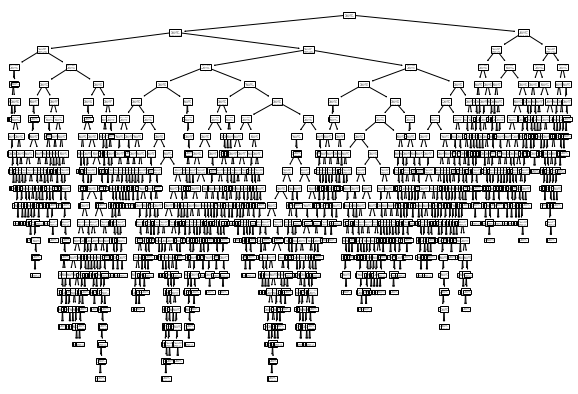

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

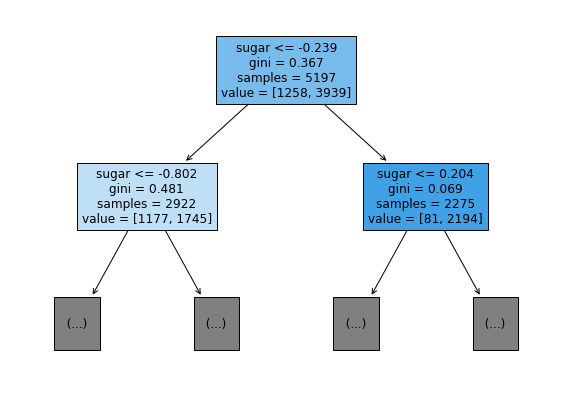

In [22]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

## 가지치기(pruning)
- 최대 트리로 형성된 결정트리의 특정 노드 밑의 트리를 제거하여 일반화 성능을 높이는 것
- 과적합을 막기위해 사용된다.
- 더 많은 가지가 생기지 않도록 최대 깊이, leaf 노드의 최대개수, 한 노드가 분할하기 위한 최소 데이터 수를 제한한다.

In [23]:
dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


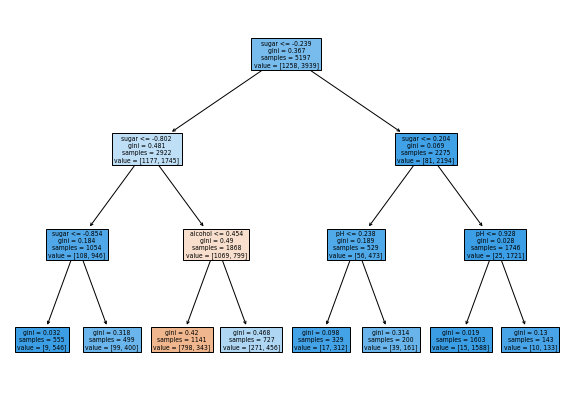

In [24]:
plt.figure(figsize=(10, 7))
plot_tree(dt, filled=True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [25]:
dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


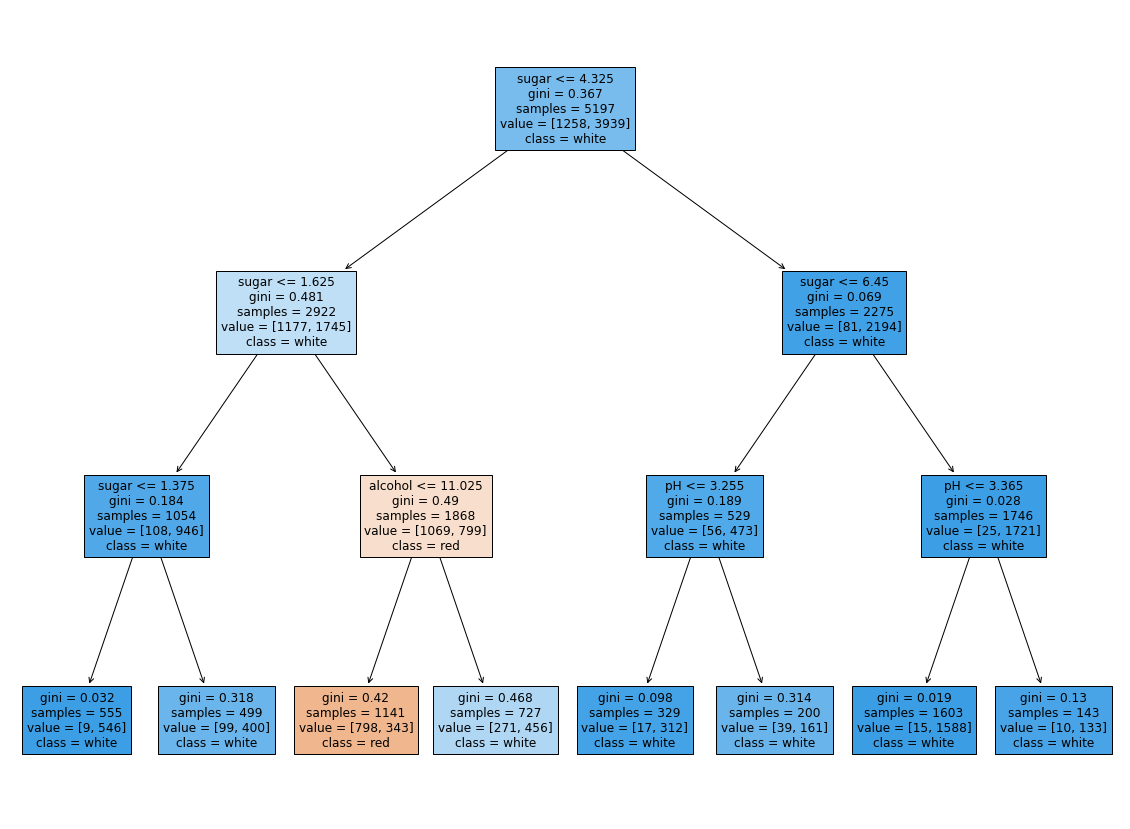

In [29]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names = ['alcohol', 'sugar', 'pH'],class_names=['red', 'white'])
plt.show()

In [27]:
# 특성 중요도 : 결정트리는 어떤 특성이 가장 유용한지를 나타내는 특성 중요도를 계산해 준다.
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])